# CSSEGISandData COVID-19

### Explore Covid data

* link: https://github.com/CSSEGISandData <br/>(Center for Systems Science and Engineering (CSSE) at Johns Hopkins University - github repository)
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-30-2023.csv

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-31-2023.csv")

In [7]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-02-01 04:20:54,33.93911,67.709953,208545,7882,NaN,NaN,Afghanistan,535.715098,3.779520
1,NaN,NaN,NaN,Albania,2023-02-01 04:20:54,41.15330,20.168300,334167,3596,NaN,NaN,Albania,11611.891028,1.076109
2,NaN,NaN,NaN,Algeria,2023-02-01 04:20:54,28.03390,1.659600,271378,6881,NaN,NaN,Algeria,618.863273,2.535578
3,NaN,NaN,NaN,Andorra,2023-02-01 04:20:54,42.50630,1.521800,47839,165,NaN,NaN,Andorra,61915.485666,0.344907
4,NaN,NaN,NaN,Angola,2023-02-01 04:20:54,-11.20270,17.873900,105184,1931,NaN,NaN,Angola,320.036336,1.835831


#### How many rows and columns are included in the df?

In [8]:
df.shape

(4016, 14)

#### How many null values are there in each column?

In [9]:
df.isna().sum()

FIPS                    748
Admin2                  744
Province_State          179
Country_Region            0
Last_Update               0
Lat                      91
Long_                    91
Confirmed                 0
Deaths                    0
Recovered              4016
Active                 4016
Combined_Key              0
Incident_Rate            94
Case_Fatality_Ratio      40
dtype: int64

#### Find Confirmed and Deaths in France

In [10]:
france_df = df.query('Country_Region == "France"')
france_df[['Confirmed','Deaths']].sum()

Confirmed    39729161
Deaths         165274
dtype: int64

#### Find Confirmed and Deaths in Europe

In [11]:
countries = ['Germany','France','United Kingdom','Italy','Spain','Netherlands','Belgium']
europe_df = df.query('Country_Region in @countries')

In [12]:
europe_grouped = europe_df.groupby('Country_Region')[['Confirmed','Deaths']].sum()

In [13]:
europe_df.pivot_table(index = 'Country_Region', values = ['Confirmed','Deaths'], aggfunc = 'sum')

,Confirmed,Deaths
Country_Region,,
Belgium,4691499,33557
France,39729161,165274
Germany,37779833,165711
Italy,25453789,186833
Netherlands,8695133,23704
Spain,13731478,118434
United Kingdom,24507298,220064


#### Calculate the death rate for each country

In [14]:
europe_grouped['Death_rate'] = europe_grouped['Deaths']/europe_grouped['Confirmed']*100
europe_grouped

,Confirmed,Deaths,Death_rate
Country_Region,,,
Belgium,4691499,33557,0.715272
France,39729161,165274,0.416002
Germany,37779833,165711,0.438623
Italy,25453789,186833,0.734009
Netherlands,8695133,23704,0.272612
Spain,13731478,118434,0.862500
United Kingdom,24507298,220064,0.897953


#### Sort countries by Deaths in descending order

In [15]:
europe_grouped.sort_values('Deaths', ascending = False)

,Confirmed,Deaths,Death_rate
Country_Region,,,
United Kingdom,24507298,220064,0.897953
Italy,25453789,186833,0.734009
Germany,37779833,165711,0.438623
France,39729161,165274,0.416002
Spain,13731478,118434,0.862500
Belgium,4691499,33557,0.715272
Netherlands,8695133,23704,0.272612


#### Sort countries by Death Rate in descending order

In [16]:
europe_grouped.sort_values('Death_rate', ascending = False)

,Confirmed,Deaths,Death_rate
Country_Region,,,
United Kingdom,24507298,220064,0.897953
Spain,13731478,118434,0.862500
Italy,25453789,186833,0.734009
Belgium,4691499,33557,0.715272
Germany,37779833,165711,0.438623
France,39729161,165274,0.416002
Netherlands,8695133,23704,0.272612


#### Create a new column above mean death rate

In [17]:
average_death_rate = europe_grouped['Death_rate'].mean()
average_death_rate

0.6195672732639288

In [18]:
europe_grouped['above_mean_death_rate'] = europe_grouped['Death_rate'].apply(lambda x: x > average_death_rate)
europe_grouped.sort_values('above_mean_death_rate', ascending = False)

,Confirmed,Deaths,Death_rate,above_mean_death_rate
Country_Region,,,,
Belgium,4691499,33557,0.715272,True
Italy,25453789,186833,0.734009,True
Spain,13731478,118434,0.862500,True
United Kingdom,24507298,220064,0.897953,True
France,39729161,165274,0.416002,False
Germany,37779833,165711,0.438623,False
Netherlands,8695133,23704,0.272612,False


#### Make a barplot using Matplotlib to show countries and death rate

In [19]:
import matplotlib.pyplot as plt

In [20]:
europe_grouped.reset_index(inplace = True)
europe_grouped

,Country_Region,Confirmed,Deaths,Death_rate,above_mean_death_rate
0,Belgium,4691499,33557,0.715272,True
1,France,39729161,165274,0.416002,False
2,Germany,37779833,165711,0.438623,False
3,Italy,25453789,186833,0.734009,True
4,Netherlands,8695133,23704,0.272612,False
5,Spain,13731478,118434,0.862500,True
6,United Kingdom,24507298,220064,0.897953,True


<Axes: xlabel='Country_Region'>

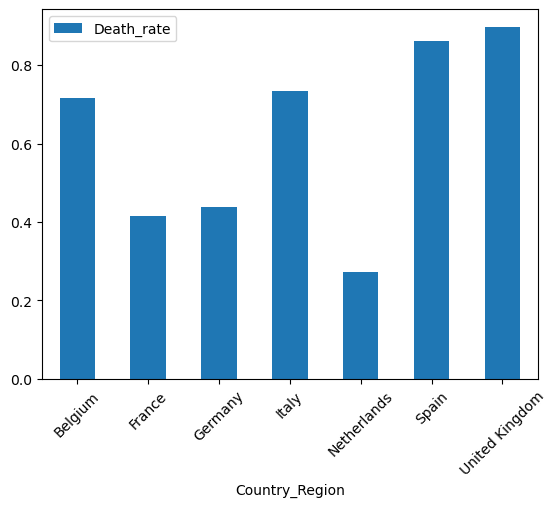

In [23]:
europe_grouped.plot(x='Country_Region', y='Death_rate', kind = 'bar', rot = 45)

#### Make the bar red if it is below average

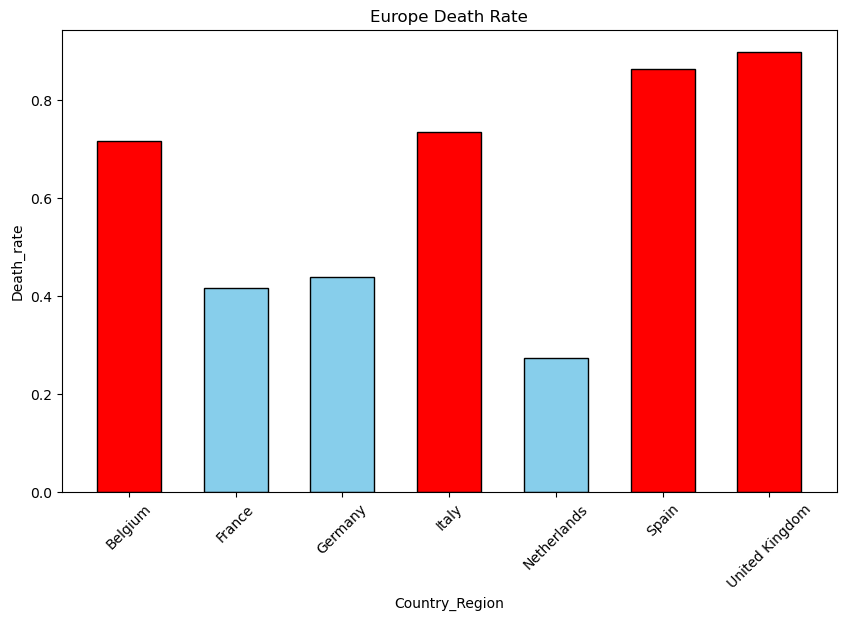

In [14]:
plt.figure(figsize=(10, 6))

colors = ['red' if rate > average_death_rate else 'skyblue' for rate in europe_grouped['Death_rate']]
plt.bar(europe_grouped['Country_Region'], europe_grouped['Death_rate'], width= 0.6, color=colors, edgecolor='black')

plt.xlabel('Country_Region')
plt.ylabel('Death_rate')
plt.title('Europe Death Rate')
plt.xticks(europe_grouped['Country_Region'], rotation=45)
plt.show()

####  Make 3 subplots with Country on x axis and Confirmed Deth Death rate on y axis

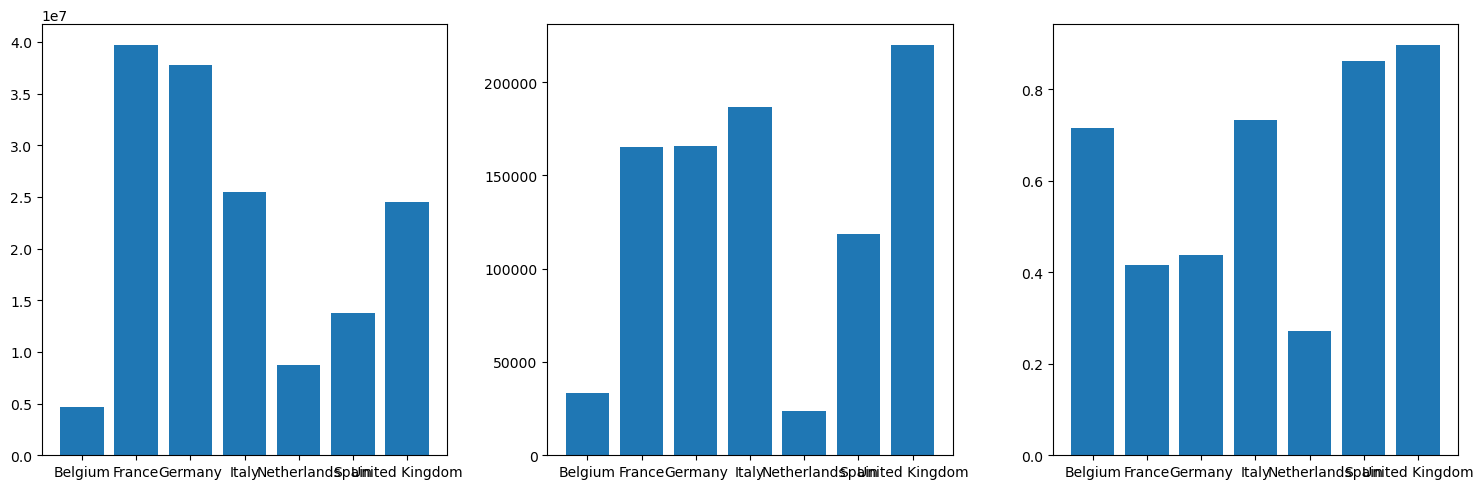

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows =1, ncols = 3, figsize= (15,5))

ax1.bar(europe_grouped['Country_Region'], europe_grouped['Confirmed'])
ax2.bar(europe_grouped['Country_Region'], europe_grouped['Deaths'])
ax3.bar(europe_grouped['Country_Region'], europe_grouped['Death_rate'])

plt.tight_layout()
plt.show()